In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Linear Regression
## Overview
    > For linear regression model, 4 different approches are listed below
    1. by matrix formula
    2. by Batch Gradient Descent
    3. by Stochastic Gradient Descent
    4. by Mini-batch Gradient Descent
## Formula
    > model formula
$$
    \hat Y = \theta^T \cdot X
$$
    
    > cost function - RMSE
$$
    MSE = \frac{1}{m}\sum_{i}^{m}{{(Y - \theta^T \cdot X)}^2}
$$

    > optimized result
$$
    \theta = {(X^TX)}^{-1}X^TY
$$

    > sklearn.linear_model could reach this by calling LinearRegression class
    > for sklearn, intercept_ is bias term, corresponding to all ones column
    > the rest parameters are stored in coef_, its number depends on features number in X

[2.88168819] [4.14808839]


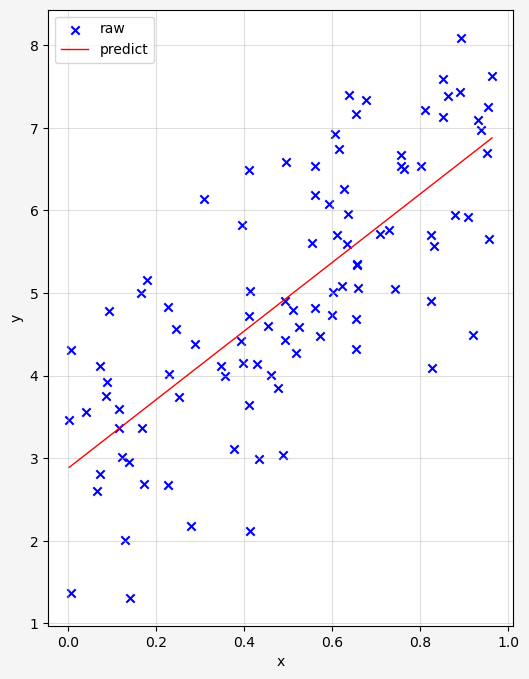

In [12]:
from sklearn.linear_model import LinearRegression

# generate linear data with random noises
X_raw = np.random.rand(100,1)
X = np.sort(X_raw,axis=0)
y = 3 + 4 * X + np.random.randn(100,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
intercept = lin_reg.intercept_
slop = lin_reg.coef_

fig, ax = plt.subplots(1,1, figsize=(6,8),
                     facecolor='whitesmoke',
                     edgecolor='gray')
scatter = ax.scatter(X, y, marker="x", color='blue', label='raw')
linear = ax.plot(X, intercept+slop*X, lw=1, color='red', label='predict')
ax.legend(loc="upper left")
ax.grid(alpha=0.4)
ax.set_xlabel("x")
ax.set_ylabel("y")
print(intercept, slop[0])

## GD
    > BGD and SGD work under the same concept, which is updating parameter vector with gradient of cost function with respect to parameter vector
    > the difference lies in training data selection. BGD will take all data into calculation, which means that data matrix is of size (m*n), while SGD only takes one random data point for training, that is a single (1* n) vector, and for the purpose of preventing over-striding which would possibly leads to divergence, we introduce learning rate to fine-tune gradient for each sgd iteration. We always tends to gradually decreate learning rate with training progressing on. This process is also called simulated annealing.
    > Mini-batch GD is of the same manner, which slightly increases number of data points in each iteration. Make sure to distingush term iteration and epoch.
1. BGD is not supported in sklearn toolset, while we could find <font color=sapphire><b>SGDRegressor in sklearn.linear_model</b></font>


    > formula for gradient
$$
        \nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T\cdot(X\cdot\theta - y)
$$

    > formulat for paramter vector update
$$
        \theta^{(next \space step)} = \theta - \eta \cdot \nabla_{\theta} MSE(\theta)
$$

    > simulated annealing formula
$$
    \eta = \frac{t_0}{f(epoch)+ t_1}
$$

In [13]:
import numpy as np

# total training epoch, hyperparameter
n_epoch = 400
# number of data points, or whole batch size
m = 100
# simulated annealing parameter, hyperparameter
t0, t1 = 5, 50
# initialization of parameter vedtor \theta
theta = np.random.randn(2,1)
# adding all zero power term(interception) to training dataset
X_b = np.c_[np.ones((100,1)),X.reshape(100,1)]
# store MSE
mse_list = []
# store theta
theta_list = []

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epoch):
    for i in range(m):
        theta_list.append(theta)
        random_index = np.random.randint(m)
        xi = X_b[random_index,:]
        yi = y[random_index,:]
        grad = 2*xi.reshape(2,1).dot(xi.reshape(1,2).dot(theta)-yi)
        mse = pow(xi.reshape(1,2).dot(theta) - yi, 2)
        mse_list.append(mse)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grad
    if epoch % 40 == 0:
        print("epoch %s: "% epoch)
        print(theta)
        print("============================")

epoch 0: 
[[3.26355466]
 [3.37315102]]
epoch 40: 
[[2.8638715 ]
 [4.18389617]]
epoch 80: 
[[2.86308398]
 [4.21591689]]
epoch 120: 
[[2.88039226]
 [4.21521669]]
epoch 160: 
[[2.84737151]
 [4.19426941]]
epoch 200: 
[[2.86489451]
 [4.19145635]]
epoch 240: 
[[2.83356243]
 [4.17132741]]
epoch 280: 
[[2.86441554]
 [4.17554049]]
epoch 320: 
[[2.86677651]
 [4.17635056]]
epoch 360: 
[[2.86944896]
 [4.17027454]]


In [14]:
theta

array([[2.8612525 ],
       [4.17036898]])

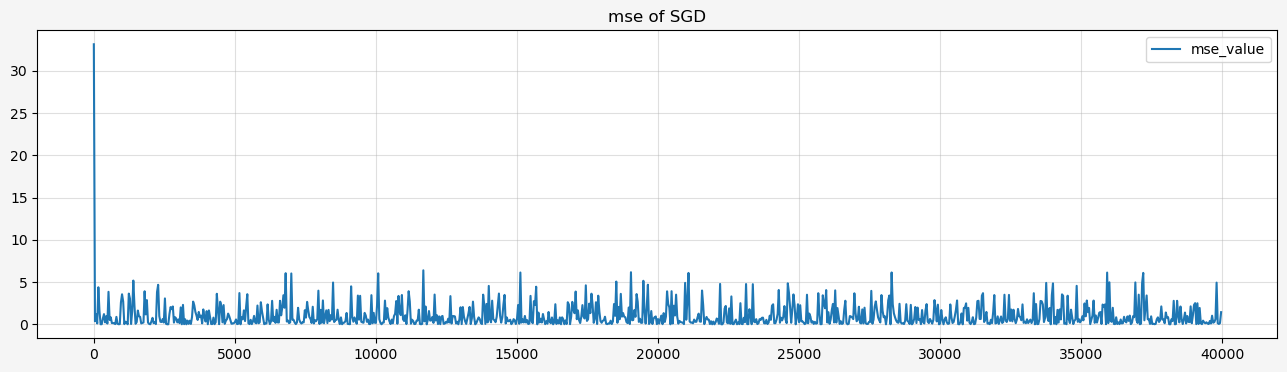

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(16,4))
ax.plot(np.asarray(list(range(len(mse_list))))[::40], np.asarray(mse_list).flatten()[::40],label="mse_value")
ax.set_title("mse of SGD")
ax.legend(loc="upper right")
ax.grid(alpha=0.4)

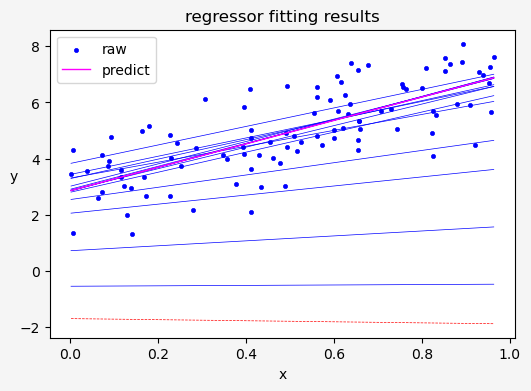

In [22]:
fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(6,4))
ax.scatter(X, y, marker=".", color="blue", lw=0.5, label="raw")
iter_op = 1
for index, (intercept, slope) in enumerate(theta_list):
    if index == 0:
        ax.plot(X, slope*X+intercept, lw=0.5,ls="--",color="red")
    if index % iter_op == 0 and index != 0:
        ax.plot(X, slope*X+intercept, lw=0.5,ls="-",color="blue")
        iter_op *= 2
ax.plot(X, theta[1]*X+theta[0], lw=1,ls="-",color="magenta", label="predict")
ax.legend(loc="upper left")
ax.set_title("regressor fitting results")
ax.set_xlabel("x")
ax.set_ylabel("y",rotation=0)
plt.show()

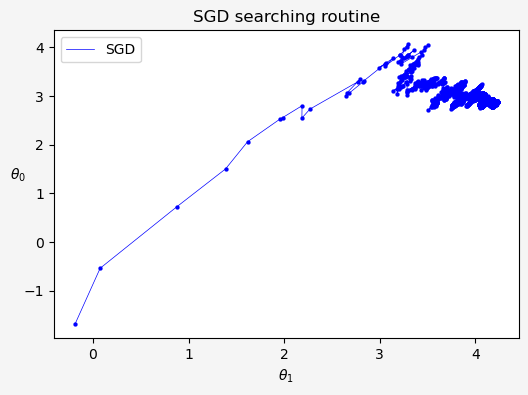

In [21]:
fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(6,4))
theta_pts = np.asarray(theta_list).flatten().reshape(len(theta_list),2)
ax.plot(theta_pts[:,1],theta_pts[:,0], lw=0.5, color="blue",label="SGD")
ax.scatter(theta_pts[:,1],theta_pts[:,0], marker='.', lw=0.1, color='blue')
ax.legend(loc="upper left")
ax.set_title("SGD searching routine")
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$', rotation=0)
plt.show()

# Polynomial Regression
1. adding higher power terms by manipulating exsting data
2. <font color=burgendy><b>sklearn.preprocessing PolynomialFeatures</b></font> could do, or simply numpy columnar manipulation would do

(100, 30)


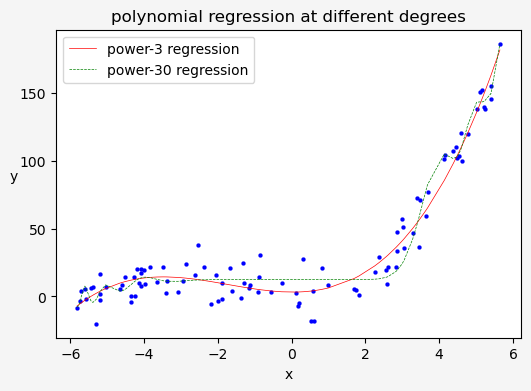

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# prepare input noise-added data
m = 100
X = np.sort(12*np.random.rand(m,1)-6, axis=0)
y = 0.5 * X**3 + 2.7 * X**2 + 3 + 12 * np.random.randn(m,1)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_features_30 = PolynomialFeatures(degree=30, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X)
X_poly_30 = poly_features_30.fit_transform(X)
print(X_poly_30.shape)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3,y)
lin_reg_30 = LinearRegression()
lin_reg_30.fit(X_poly_30,y)

y_3 = lin_reg_3.intercept_ * np.ones_like(X) + X_poly_3.dot(lin_reg_3.coef_.T)
y_30 = lin_reg_30.intercept_ * np.ones_like(X) + X_poly_30.dot(lin_reg_30.coef_.T)

fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(6,4))
ax.scatter(X, y, marker='.', color="b", lw=0.1)
ax.plot(X, y_3, lw=0.5, ls="-", color="red", label="power-3 regression")
ax.plot(X, y_30, lw=0.5, ls="--", color="green", label="power-30 regression")
ax.legend(loc='upper left')
ax.set_title("polynomial regression at different degrees")
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)
plt.show()

In [49]:
print(lin_reg_3.intercept_, lin_reg_3.coef_)

[3.20056442] [[-0.11813792  2.69815955  0.51906917]]


# learning curve
1. one efficient way to decide wether a model is over fitting or underfitting.
2. main trick is increase volume of training set and testing set gradually and compare their cost function value, in regression case, this is MSE or RMSE

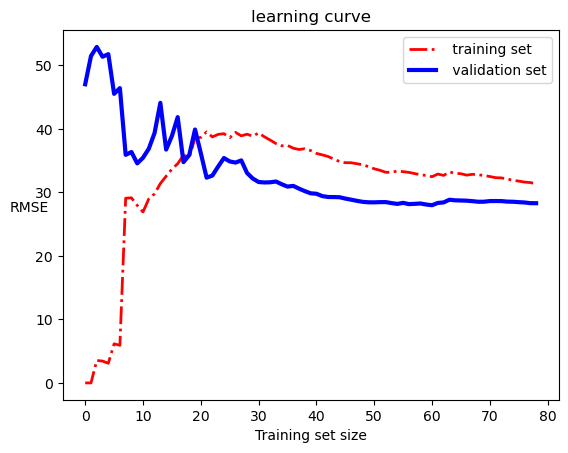

In [58]:
# let's take cubic function above
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # list store mse of training and testing
    train_errors, test_errors = [], []
    # increase volume of training set gradually
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    plt.plot(np.sqrt(train_errors),lw=2,ls='-.', color='red', label=" training set")
    plt.plot(np.sqrt(test_errors),lw=3,ls='-', color='blue', label=" validation set")
    plt.legend(loc="upper right")
    plt.title("learning curve")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE", rotation=0)

# this case we'll show underfitting
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

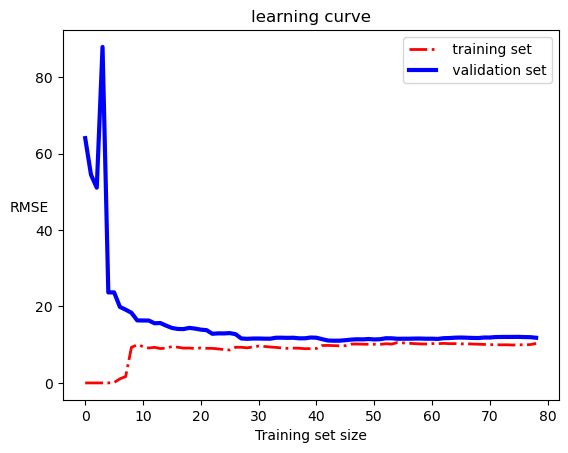

In [66]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("sgd_red", LinearRegression())
    ])
plot_learning_curves(polynomial_regression, X, y)

# Regularization
1. basic concept is adding terms with regards with parameter vector on training cost function to constrain paramters
2. usually cost function in training set is different from that in test set.
## Ridge Regression
$$
    J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^{n}{{\theta_{i}}^2}
$$

    > closed-form formula

$$
    \hat \theta = {(X^T \cdot X + \alpha I)}^{-1} + X^T \cdot y
$$
* where $I$ is one $(n*n)$ identity matrix

> linear_model Ridge or linear_model SGDRegressor(penalty='l2')

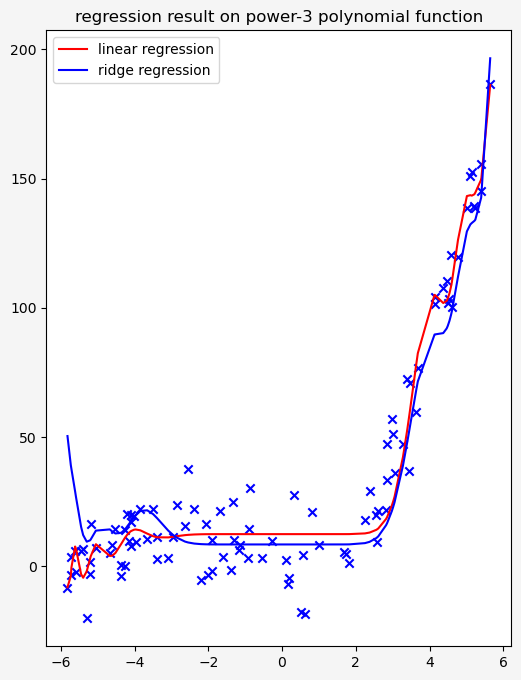

In [84]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly_30, y)
y_pred_ridge = ridge_reg.predict(X_poly_30)

fig, ax = plt.subplots(1,1, figsize=(6,8),
                      facecolor='whitesmoke',
                      edgecolor='gray')
ax.scatter(X,y, marker='x', color='b')
ax.plot(X,y_30, '-r', label="linear regression")
ax.plot(X,y_pred_ridge, '-b', label="ridge regression")
ax.legend(loc="upper left")
ax.set_title("regression result on power-3 polynomial function")
plt.show()

## Lasso


# Logistic Regression
1. commonly used to estimate the probability that an instance belongs to a particular class, all outputs of model will be processed through one continuously differentiable function.
$$
    \sigma(t) = \frac{1}{1 + e^{-t}}
$$
2. output of model will be precessed by
$$
    \hat p = h_{\theta}(x) = \sigma(\theta^T \cdot \vec x)
$$
3. for a sigmoid function, the threshold is always set as 0.5, this is used in one binary classifier

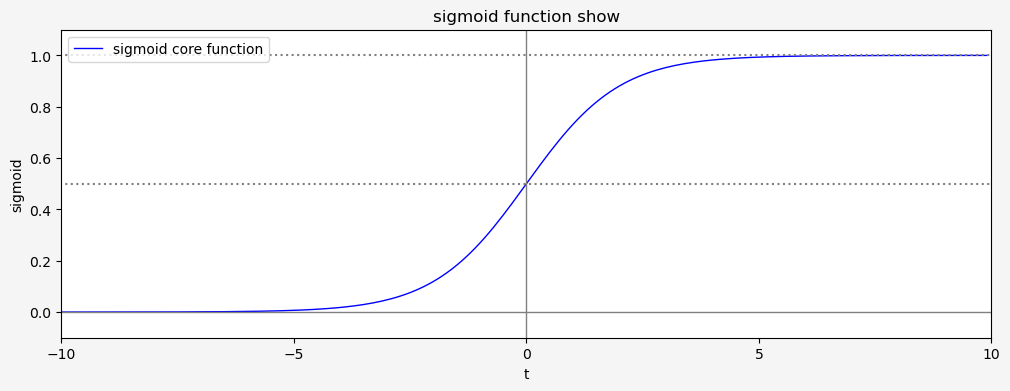

In [119]:
from matplotlib import pyplot as plt
%matplotlib inline

sigma_x = np.arange(-10,10,0.1)
sigma_y = 1 /(1 + np.power(np.e, -sigma_x))
fig, ax = plt.subplots(1,1,figsize=(12,4),facecolor='whitesmoke', edgecolor='gray')
ax.plot(sigma_x, sigma_y, lw=1, ls= '-', color='blue',label="sigmoid core function")
ax.legend(loc="upper left")
ax.set_xlabel("t")
ax.set_ylabel("sigmoid")
ax.set_xticks(np.arange(-10,10.1,5))
ax.set_yticks(np.arange(0,1.2,0.2))
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,1.1)
ax.set_title('sigmoid function show')
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.hlines(0.5,-12,12, ls=':', color='gray')
ax.hlines(1.0,-12,12, ls=':', color='gray')
plt.show()